In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [13]:
data_train_path = "Fruits_Vegetables/Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/Fruits_Vegetables/validation"

In [14]:
img_width = 180
img_height = 180

In [15]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path, 
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [16]:
data_cat = data_train.class_names

In [59]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [17]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path, 
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 351 files belonging to 36 classes.


In [18]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path, 
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 359 files belonging to 36 classes.


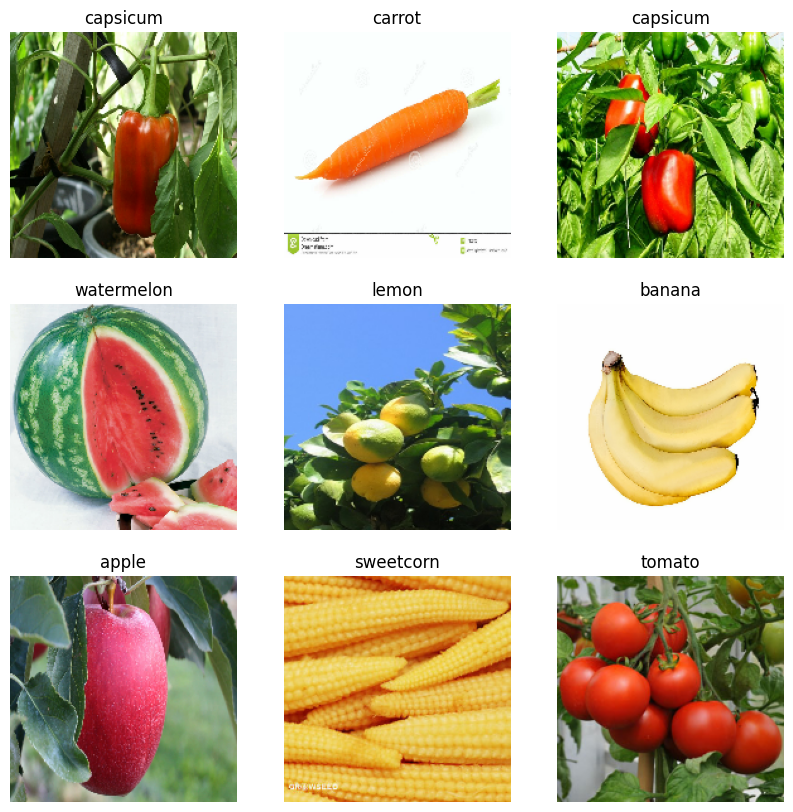

In [21]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1) :
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
model = Sequential([
    layers.Rescaling(1/255),
    layers.Conv2D(16 , 3 , padding = "same" , activation = "relu"),
    layers.MaxPooling2D() ,
    layers.Conv2D(32 , 3 , padding = 'same' , activation = 'relu'),
    layers.MaxPooling2D(), 
    layers.Conv2D(64 , 3 , padding = 'same' , activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [32]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
epochs = 25
history = model.fit(data_train , validation_data=data_val , epochs=epochs)

Epoch 1/25


98/98 [==============================] - 120s 1s/step - loss: 3.1846 - accuracy: 0.1210 - val_loss: 2.2542 - val_accuracy: 0.3846
Epoch 2/25
98/98 [==============================] - 126s 1s/step - loss: 2.3317 - accuracy: 0.3220 - val_loss: 1.6618 - val_accuracy: 0.5328
Epoch 3/25
98/98 [==============================] - 118s 1s/step - loss: 1.9433 - accuracy: 0.4186 - val_loss: 1.1655 - val_accuracy: 0.6553
Epoch 4/25
98/98 [==============================] - 135s 1s/step - loss: 1.5209 - accuracy: 0.5531 - val_loss: 0.7647 - val_accuracy: 0.7949
Epoch 5/25
98/98 [==============================] - 131s 1s/step - loss: 1.0050 - accuracy: 0.7079 - val_loss: 0.5410 - val_accuracy: 0.8803
Epoch 6/25
98/98 [==============================] - 119s 1s/step - loss: 0.6204 - accuracy: 0.8212 - val_loss: 0.4406 - val_accuracy: 0.9288
Epoch 7/25
98/98 [==============================] - 109s 1s/step - loss: 0.3772 - accuracy: 0.8986 - val_loss: 0.4407 - val_accuracy: 0.9316
Epoch 8/25
98/98 [======

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [35]:
model.save("fruits_vegetables_model.keras")

In [36]:
# Load the saved model
loaded_model = keras.models.load_model("fruits_vegetables_model.keras")

# Evaluate the loaded model on the test dataset
test_loss, test_acc = loaded_model.evaluate(data_test)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

12/12 [==============================] - 12s 272ms/step - loss: 0.3527 - accuracy: 0.9526
Test accuracy: 0.9526, Test loss: 0.3527


Text(0.5, 1.0, 'Loss')

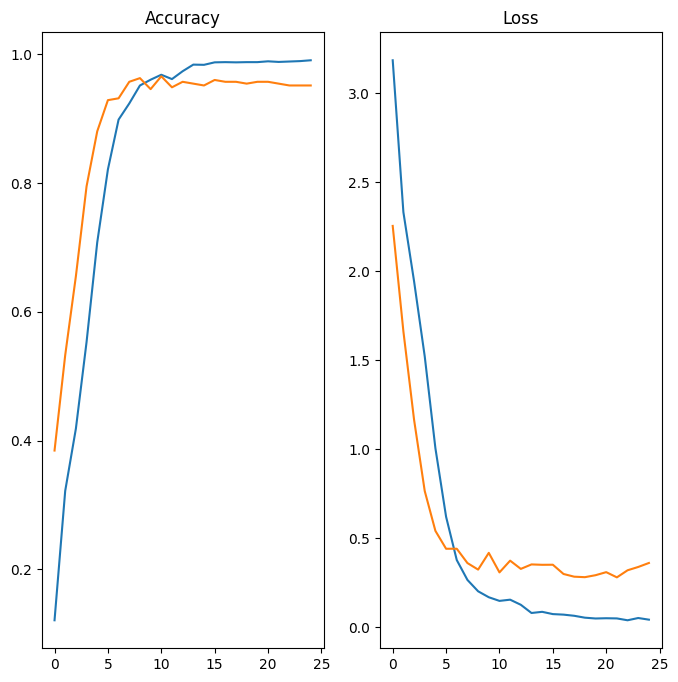

In [38]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [54]:
image = 'Fruits_Vegetables\Fruits_Vegetables\Corn.jpg'
image = tf.keras.utils.load_img(image, target_size = (img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, axis=0)

In [55]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 37ms/step


In [56]:
score = tf.nn.softmax(predict)

In [57]:
print('Veg/Fruit in Image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], 100 * np.max(score)))

Veg/Fruit in Image is corn with accuracy of 95.56


In [58]:
model.save("fruits_vegetables_model.keras")

c:\Users\luqma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
